# **Sales Analytics**

In [90]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [91]:
#importing the dataset
df1=pd.read_csv("Sales_Data.csv")
df2=pd.read_csv("Glance_Views.csv")

### **Columns in Sales Data**

- SKU_NAME: Unique identifier for the product.
- FEED_DATE: Date of the sales record
- CATEGORY: Broad category of the product.	
- SUB_CATEGORY: More specific classification within the category. 	
- ORDERED_REVENUE: Total revenue generated from orders. 	
- ORDERED_UNITS: Number of units sold.	
- REP_OOS: Reported Out of Stock instances. 

### **Columns in Glance Views**
- SKU_NAME: Unique identifier for the product.	
- FEED_DATE: Date of the record.	
- VIEWS: Number of product page views. 	
- UNITS: Number of units sold based on views 

In [92]:
df1

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
0,B12020KBUI,5/18/2019,1000 Inputs,1002 Mice,0.00,0,0.0
1,B12020KBUI,5/19/2019,1000 Inputs,1002 Mice,0.00,0,0.0
2,B12020KBUI,5/22/2019,1000 Inputs,1002 Mice,0.00,0,0.0
3,B12020KBUI,5/23/2019,1000 Inputs,1002 Mice,0.00,0,0.0
4,B12020KBUI,5/27/2019,1000 Inputs,1002 Mice,0.00,0,0.0
...,...,...,...,...,...,...,...
41110,D29S5IMRDI,8/27/2019,1000 Inputs,1007 Other Input Devices,129.99,1,0.0
41111,D29S5IMRDI,8/28/2019,1000 Inputs,1007 Other Input Devices,259.98,2,0.0
41112,D29S5IMRDI,8/29/2019,1000 Inputs,1007 Other Input Devices,259.98,2,0.0
41113,D29S5IMRDI,8/30/2019,1000 Inputs,1007 Other Input Devices,259.98,2,0.0


In [93]:
df2

,SKU_NAME,FEED_DATE,VIEWS,UNITS
0,B1212:PZ:V,5/1/2019,455,16
1,B1212:PZ:V,5/2/2019,478,12
2,B1212:PZ:V,5/3/2019,681,42
3,B1212:PZ:V,5/4/2019,662,70
4,B1212:PZ:V,5/5/2019,568,33
...,...,...,...,...
40740,C08N8KVJDZ,8/27/2019,225,-1
40741,C08N8KVJDZ,8/28/2019,219,0
40742,C08N8KVJDZ,8/29/2019,264,0
40743,C08N8KVJDZ,8/30/2019,260,8


#### **Descriptive Statistics**

In [94]:
#shape of the data
df1.shape

(41115, 7)

In [95]:
df2.shape

(40745, 4)

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41115 entries, 0 to 41114
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SKU_NAME         41115 non-null  object 
 1   FEED_DATE        41115 non-null  object 
 2   CATEGORY         41115 non-null  object 
 3   SUB_CATEGORY     41115 non-null  object 
 4   ORDERED_REVENUE  41115 non-null  float64
 5   ORDERED_UNITS    41115 non-null  int64  
 6   REP_OOS          40426 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.2+ MB


There are null values in REP_OOS column

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40745 entries, 0 to 40744
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SKU_NAME   40745 non-null  object
 1   FEED_DATE  40745 non-null  object
 2   VIEWS      40745 non-null  int64 
 3   UNITS      40745 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


#### **Convert Feed Date to datetime format**

In [98]:
df1['FEED_DATE'] = pd.to_datetime(df1['FEED_DATE'])
df2['FEED_DATE'] = pd.to_datetime(df2['FEED_DATE'])

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41115 entries, 0 to 41114
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SKU_NAME         41115 non-null  object        
 1   FEED_DATE        41115 non-null  datetime64[ns]
 2   CATEGORY         41115 non-null  object        
 3   SUB_CATEGORY     41115 non-null  object        
 4   ORDERED_REVENUE  41115 non-null  float64       
 5   ORDERED_UNITS    41115 non-null  int64         
 6   REP_OOS          40426 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.2+ MB


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40745 entries, 0 to 40744
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SKU_NAME   40745 non-null  object        
 1   FEED_DATE  40745 non-null  datetime64[ns]
 2   VIEWS      40745 non-null  int64         
 3   UNITS      40745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.2+ MB


In [101]:
for i in df1.columns:
    print('Data type of the column {} is {}'.format(i,df1[i].dtype))
    print('Number of unique values in the column {} is {}'.format(i,df1[i].nunique()))
    print('Null values in the column {} is {}'.format(i,df1[i].isnull().sum()))
    print('='*90)

Data type of the column SKU_NAME is object
Number of unique values in the column SKU_NAME is 465
Null values in the column SKU_NAME is 0
Data type of the column FEED_DATE is datetime64[ns]
Number of unique values in the column FEED_DATE is 123
Null values in the column FEED_DATE is 0
Data type of the column CATEGORY is object
Number of unique values in the column CATEGORY is 10
Null values in the column CATEGORY is 0
Data type of the column SUB_CATEGORY is object
Number of unique values in the column SUB_CATEGORY is 24
Null values in the column SUB_CATEGORY is 0
Data type of the column ORDERED_REVENUE is float64
Number of unique values in the column ORDERED_REVENUE is 15506
Null values in the column ORDERED_REVENUE is 0
Data type of the column ORDERED_UNITS is int64
Number of unique values in the column ORDERED_UNITS is 1011
Null values in the column ORDERED_UNITS is 0
Data type of the column REP_OOS is float64
Number of unique values in the column REP_OOS is 3388
Null values in the co

In [102]:
for i in df2.columns:
    print('Data type of the column {} is {}'.format(i,df2[i].dtype))
    print('Number of unique values in the column {} is {}'.format(i,df2[i].nunique()))
    print('Null values in the column {} is {}'.format(i,df2[i].isnull().sum()))
    print('='*90)

Data type of the column SKU_NAME is object
Number of unique values in the column SKU_NAME is 452
Null values in the column SKU_NAME is 0
Data type of the column FEED_DATE is datetime64[ns]
Number of unique values in the column FEED_DATE is 123
Null values in the column FEED_DATE is 0
Data type of the column VIEWS is int64
Number of unique values in the column VIEWS is 4370
Null values in the column VIEWS is 0
Data type of the column UNITS is int64
Number of unique values in the column UNITS is 1011
Null values in the column UNITS is 0


#### **Checking Missing values**

In [103]:
df1.isna().sum()

SKU_NAME             0
FEED_DATE            0
CATEGORY             0
SUB_CATEGORY         0
ORDERED_REVENUE      0
ORDERED_UNITS        0
REP_OOS            689
dtype: int64

REP_OOS contains 689 null values

Zero out of stock events


In [104]:
df1['REP_OOS'] = df1['REP_OOS'].fillna(0)

In [105]:
df2.isna().sum()

SKU_NAME     0
FEED_DATE    0
VIEWS        0
UNITS        0
dtype: int64

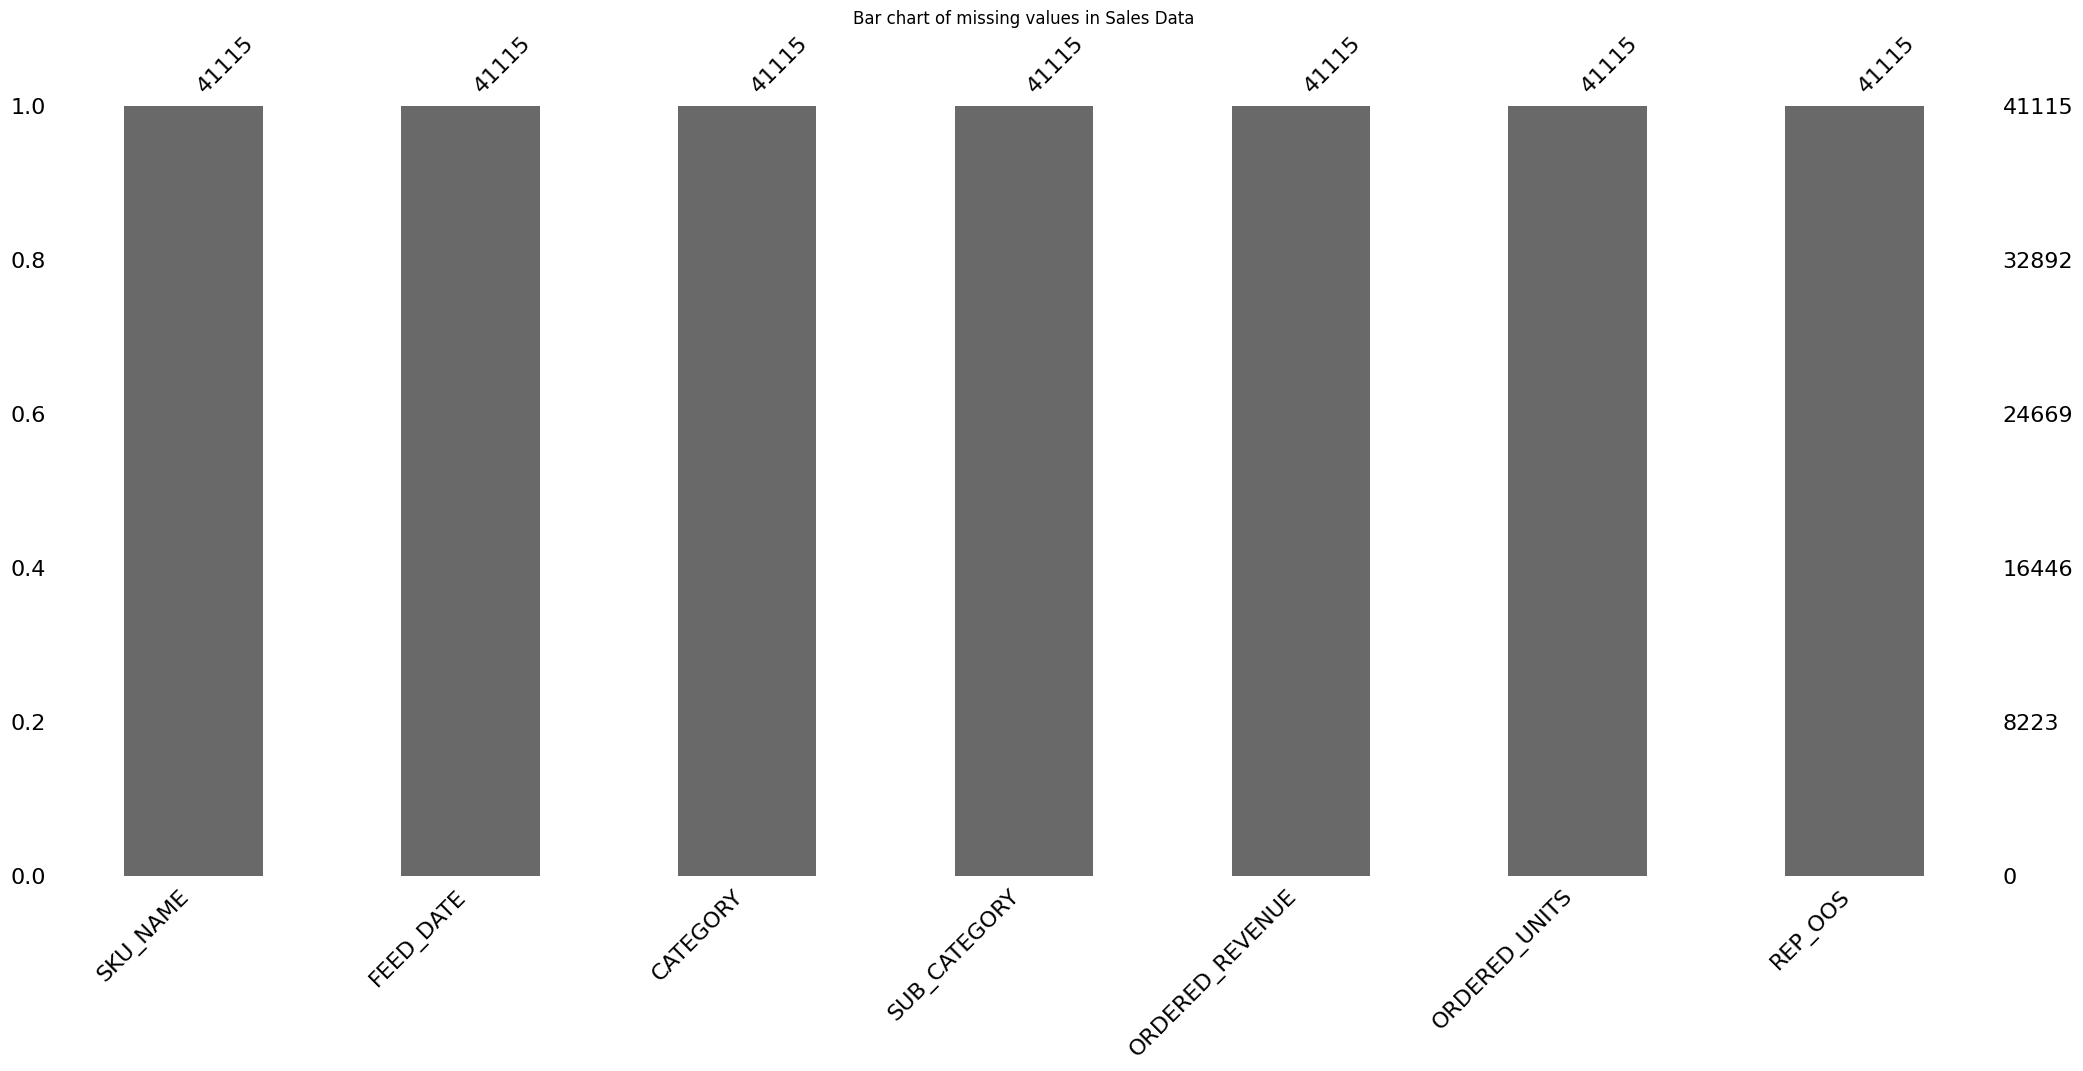

In [106]:
msno.bar(df1)
plt.title('Bar chart of missing values in Sales Data')
plt.show()

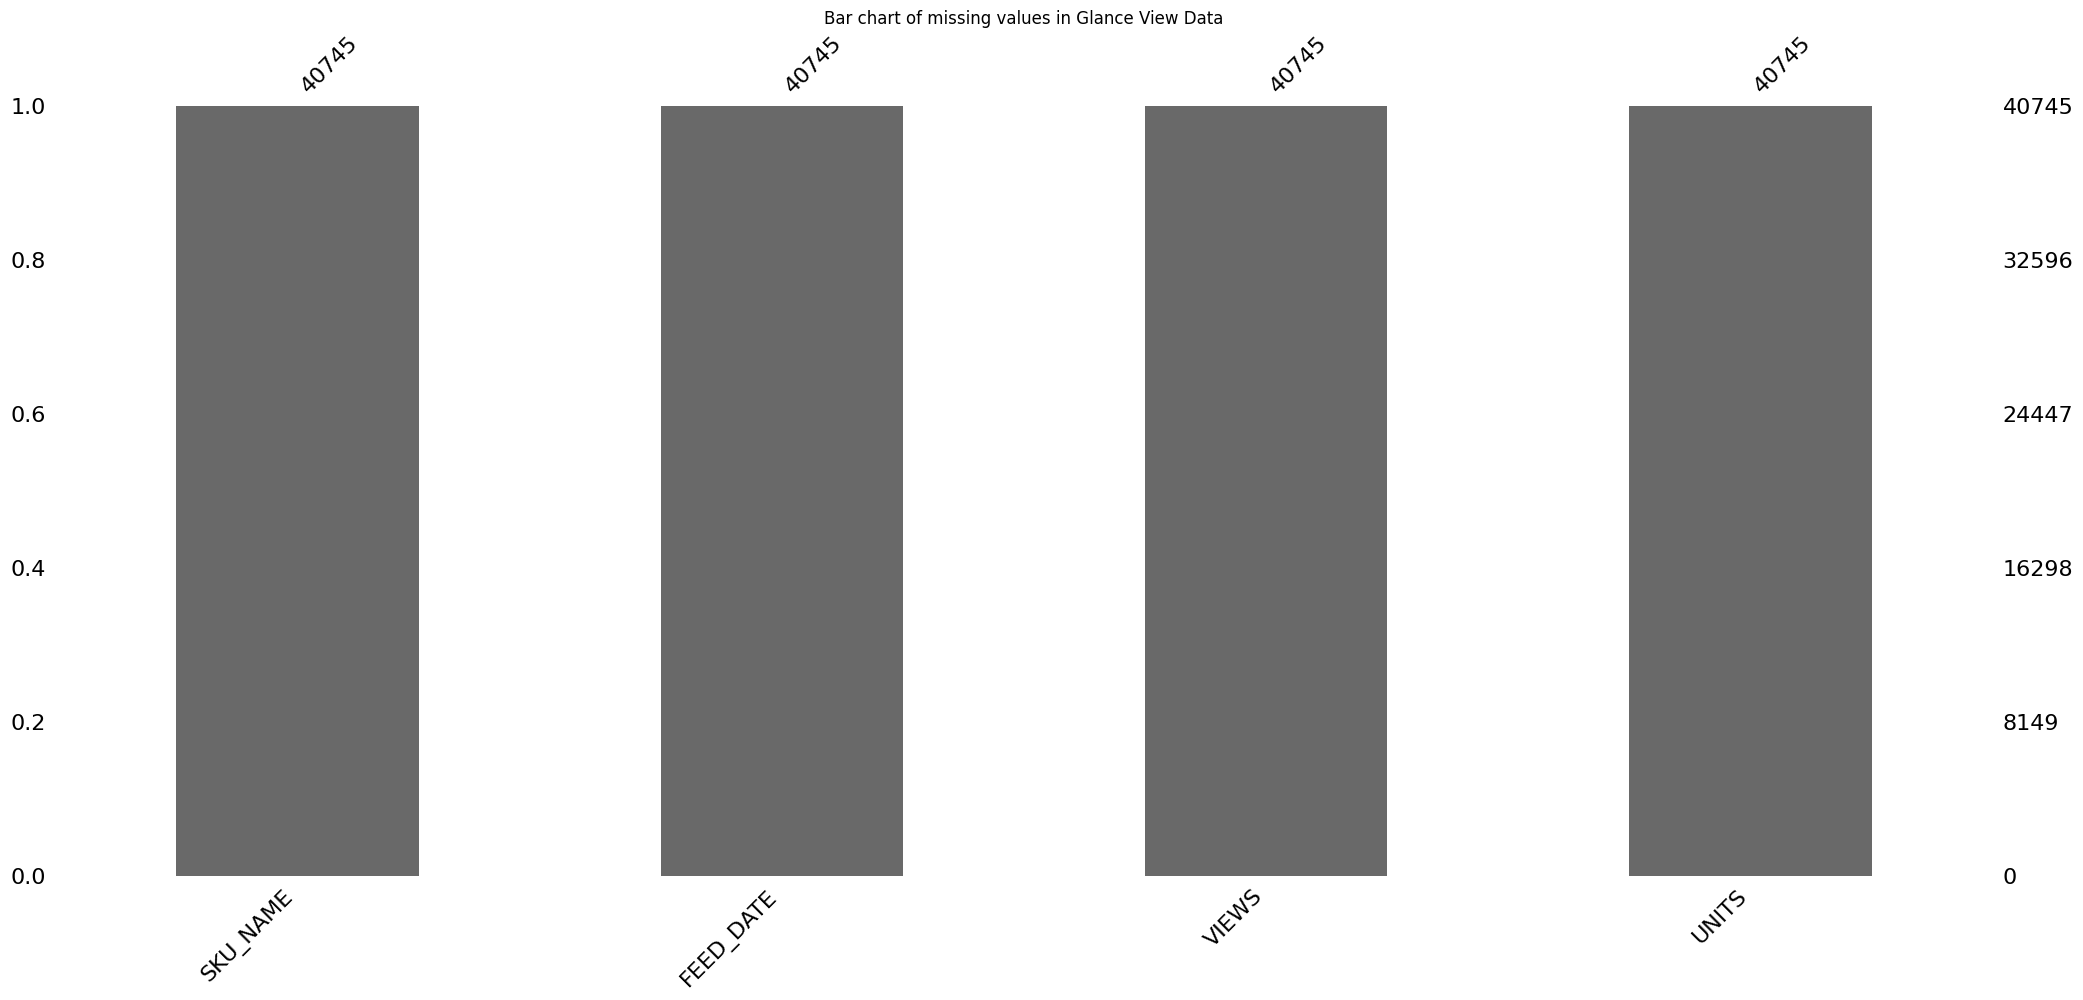

In [107]:
msno.bar(df2)
plt.title('Bar chart of missing values in Glance View Data')
plt.show()

In [108]:
df1.describe(include='all')

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
count,41115,41115,41115,41115,4.111500e+04,41115.000000,41115.000000
unique,465,NaN,10,24,NaN,NaN,NaN
top,D2869MTWCQ,NaN,1000 Inputs,1002 Mice,NaN,NaN,NaN
freq,123,NaN,26943,8692,NaN,NaN,NaN
mean,NaN,2019-07-01 17:44:36.950018304,NaN,NaN,2.206692e+03,50.904804,8.655594
min,NaN,2019-05-01 00:00:00,NaN,NaN,-3.565780e+04,-934.000000,0.000000
25%,NaN,2019-06-01 00:00:00,NaN,NaN,0.000000e+00,0.000000,0.000000
50%,NaN,2019-07-02 00:00:00,NaN,NaN,4.472100e+02,6.000000,3.750000
75%,NaN,2019-08-02 00:00:00,NaN,NaN,2.123820e+03,34.000000,10.890000
max,NaN,2019-08-31 00:00:00,NaN,NaN,1.121838e+06,16367.000000,118.520000


In [109]:
df2.describe(include='all')

,SKU_NAME,FEED_DATE,VIEWS,UNITS
count,40745,40745,40745.00000,40745.000000
unique,452,NaN,NaN,NaN
top,B1212:PZ:V,NaN,NaN,NaN
freq,123,NaN,NaN,NaN
mean,NaN,2019-07-01 14:20:21.587924736,852.54495,51.400982
min,NaN,2019-05-01 00:00:00,1.00000,-934.000000
25%,NaN,2019-06-01 00:00:00,169.00000,0.000000
50%,NaN,2019-07-02 00:00:00,397.00000,6.000000
75%,NaN,2019-08-01 00:00:00,995.00000,35.000000
max,NaN,2019-08-31 00:00:00,176162.00000,16367.000000


#### **Duplicate Check**

In [110]:
df1.duplicated().sum()

0

In [111]:
df2.duplicated().sum()

0

No duplicates in the both datasets

---

### **Univariate Analysis**

In [112]:
merged_data = pd.merge(df1, df2, on=['SKU_NAME', 'FEED_DATE'], how='inner')
#remove units column
merged_data = merged_data.drop('UNITS', axis=1)

In [113]:
merged_data

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,VIEWS
0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.00,0,0.0,8
1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.00,0,0.0,5
2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.00,0,0.0,8
3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.00,0,0.0,4
4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.00,0,0.0,9
...,...,...,...,...,...,...,...,...
40421,D29S5IMRDI,2019-08-27,1000 Inputs,1007 Other Input Devices,129.99,1,0.0,104
40422,D29S5IMRDI,2019-08-28,1000 Inputs,1007 Other Input Devices,259.98,2,0.0,108
40423,D29S5IMRDI,2019-08-29,1000 Inputs,1007 Other Input Devices,259.98,2,0.0,86
40424,D29S5IMRDI,2019-08-30,1000 Inputs,1007 Other Input Devices,259.98,2,0.0,89


In [114]:
merged_data['YEAR'] = merged_data['FEED_DATE'].dt.year
merged_data['MONTH'] = merged_data['FEED_DATE'].dt.month
merged_data['DAY'] = merged_data['FEED_DATE'].dt.day
merged_data['WEEKDAY'] = merged_data['FEED_DATE'].dt.weekday


In [115]:
merged_data.describe()

,FEED_DATE,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,VIEWS,YEAR,MONTH,DAY,WEEKDAY
count,40426,4.042600e+04,40426.000000,40426.000000,40426.000000,40426.0,40426.000000,40426.000000,40426.000000
mean,2019-07-01 16:45:17.142433024,2.244341e+03,51.772696,8.803116,855.868006,2019.0,6.525132,15.930738,3.013382
min,2019-05-01 00:00:00,-3.565780e+04,-934.000000,0.000000,1.000000,2019.0,5.000000,1.000000,0.000000
25%,2019-06-01 00:00:00,0.000000e+00,0.000000,0.000000,170.000000,2019.0,6.000000,8.000000,1.000000
50%,2019-07-02 00:00:00,4.783800e+02,6.000000,3.980000,399.000000,2019.0,7.000000,16.000000,3.000000
75%,2019-08-02 00:00:00,2.187637e+03,36.000000,11.040000,1003.000000,2019.0,8.000000,24.000000,5.000000
max,2019-08-31 00:00:00,1.121838e+06,16367.000000,118.520000,176162.000000,2019.0,8.000000,31.000000,6.000000
std,NaN,9.480891e+03,211.808279,17.431879,2103.969243,0.0,1.121014,8.847382,1.971358


In [116]:
categorical_analysis = {
    col: merged_data[col].value_counts()
    for col in merged_data.select_dtypes(include=['object']).columns
}

categorical_analysis

{'SKU_NAME': SKU_NAME
 B11J0HXCQI    123
 C03CBL[721    123
 B28D3XMS37    123
 D27B3YDDMX    123
 D11DRPRJ84    123
              ... 
 D01CLVJV9A      1
 B123P7CEQM      1
 D235O9[O\M      1
 C12;C;8OPZ      1
 B21E\9ZKDH      1
 Name: count, Length: 452, dtype: int64,
 'CATEGORY': CATEGORY
 1000 Inputs                         26714
 5000 Portable Media Players          5658
 5300 Headphones                      1849
 5600 Video Components                1607
 1500 Tablet Accessories              1536
 10800 Xbox One Accessories           1399
 1600 Sony PSP Games and Software      780
 0400 Computer Peripherals             597
 6200 PC Accessories                   235
 0100 Wireless Phones                   51
 Name: count, dtype: int64,
 'SUB_CATEGORY': SUB_CATEGORY
 1002 Mice                                    8509
 1001 Keyboards                               5844
 5045 Media Speaker Systems                   4979
 1004 Computer Headsets and Mics              4190
 1003 Computer

- **Revenue**: Ranges from negative values (likely anomalies) to a maximum of $1,121,838.
- **Units Sold**: Includes negative values, which need further review for validity.
- **Views**: Averages 856 views per product, with a maximum of 176,162 views.
- **SKU_NAME**: 452 unique SKUs, with the most frequent SKUs appearing 123 times.
- **CATEGORY**: The most common category is "1000 Inputs", accounting for over 26,000 records.
- **SUB_CATEGORY**: The top subcategory is "1002 Mice", with 8,509 records, followed by Keyboards and Media Speaker Systems.

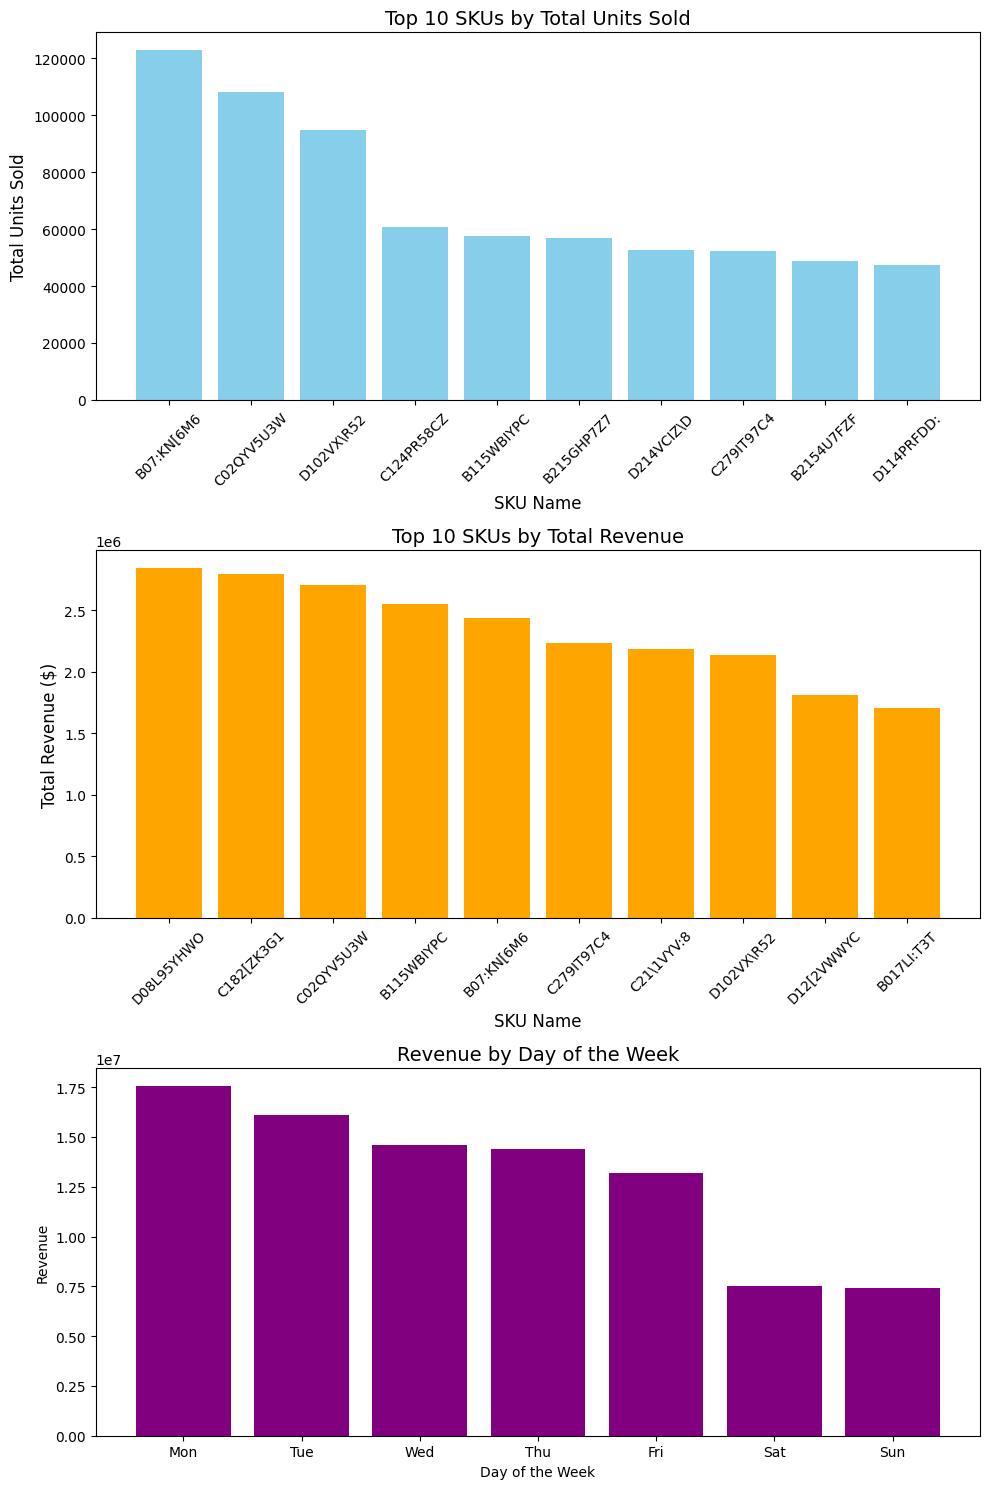

In [117]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Aggregating data to find the top SKUs by total units sold
top_skus = merged_data.groupby('SKU_NAME')['ORDERED_UNITS'].sum().sort_values(ascending=False).head(10)

# Plotting the top SKUs by total units sold
axes[0].bar(top_skus.index, top_skus.values, color='skyblue')
axes[0].set_title('Top 10 SKUs by Total Units Sold', fontsize=14)
axes[0].set_xlabel('SKU Name', fontsize=12)
axes[0].set_ylabel('Total Units Sold', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Aggregating data to find the top SKUs by total revenue
top_revenue_skus = merged_data.groupby('SKU_NAME')['ORDERED_REVENUE'].sum().sort_values(ascending=False).head(10)

# Plotting the top SKUs by total revenue
axes[1].bar(top_revenue_skus.index, top_revenue_skus.values, color='orange')
axes[1].set_title('Top 10 SKUs by Total Revenue', fontsize=14)
axes[1].set_xlabel('SKU Name', fontsize=12)
axes[1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Weekday Revenue
weekday_revenue = merged_data.groupby('WEEKDAY')['ORDERED_REVENUE'].sum().reset_index()
weekday_revenue = weekday_revenue.sort_values('ORDERED_REVENUE', ascending=False)
axes[2].bar(weekday_revenue['WEEKDAY'], weekday_revenue['ORDERED_REVENUE'], color='purple')
axes[2].set_title('Revenue by Day of the Week', fontsize=14)
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Revenue')

plt.tight_layout()
plt.show()


#### **Insights**
- Top 10 SKUs by Total Units Sold:

    - The first subplot highlights the most popular SKUs based on total units sold.
    - A few SKUs significantly outperform the rest, indicating high demand or effective promotions.
    - SKU dominance might suggest targeted marketing or restocking priorities for these products.
- Top 10 SKUs by Total Revenue:

    - The second subplot shows SKUs contributing the most revenue.
    - There may be overlap between high-unit SKUs and high-revenue SKUs, though revenue may also be driven by high-price items.
    - Products with high revenue but lower units sold could represent premium offerings.
- Revenue by Day of the Week:

    - The third subplot indicates revenue patterns across the week.
    - Peaks and troughs suggest consumer shopping behavior, such as higher purchases during weekends or specific weekdays.
    - If weekdays show consistent dips, weekday-specific promotions could be an area of improvement.


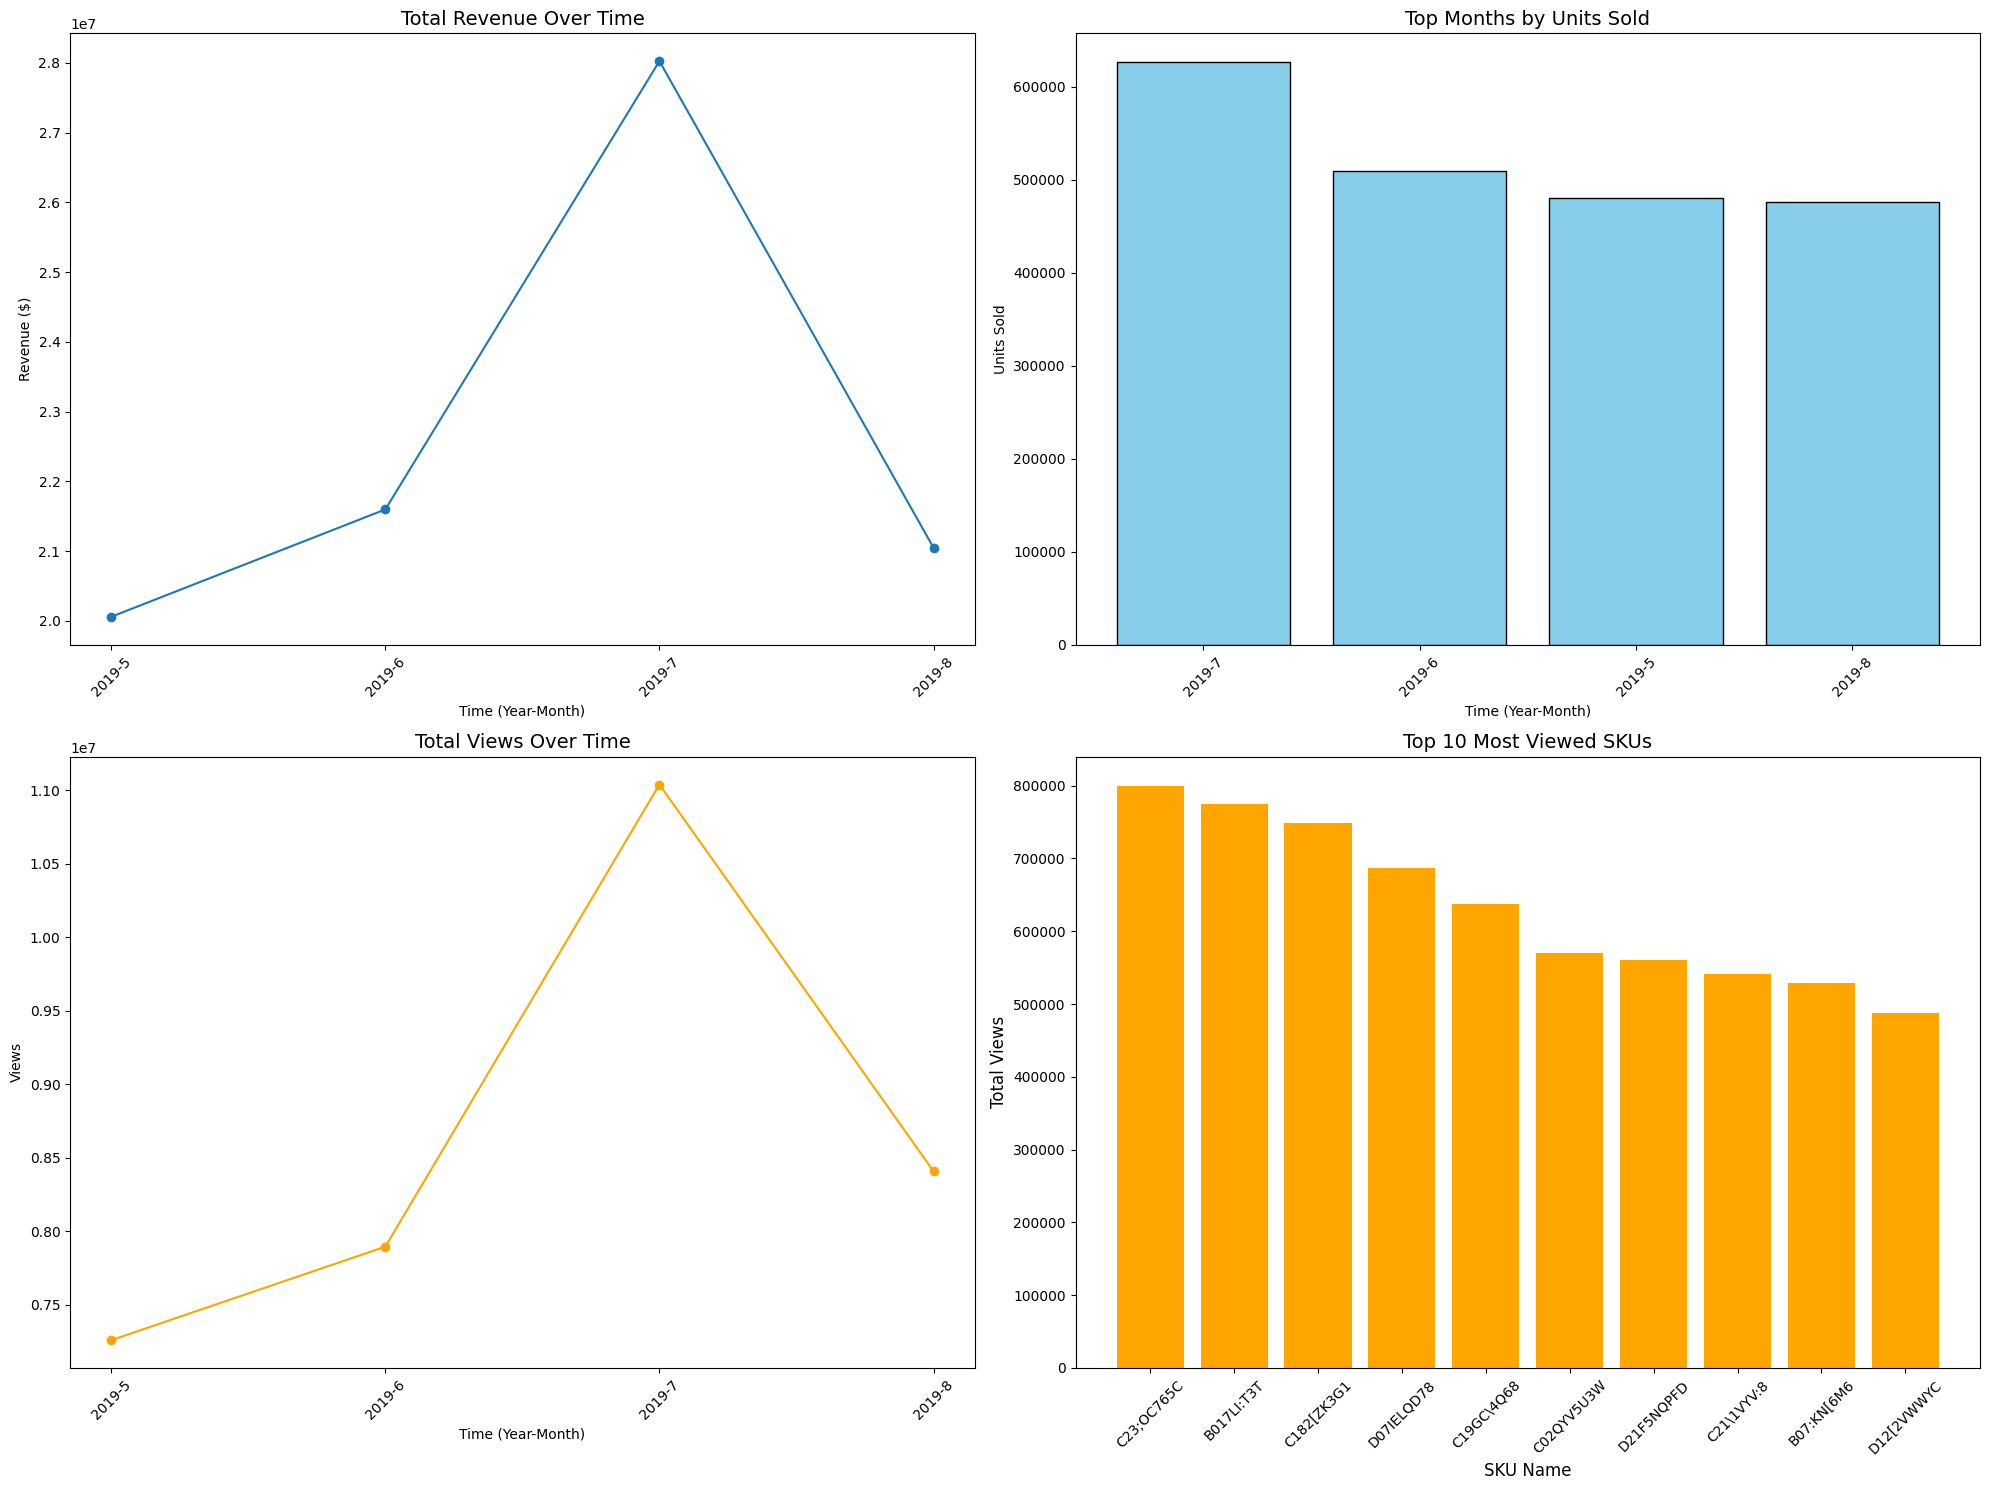

In [118]:
# Aggregate data for insights
monthly_sales = merged_data.groupby(['YEAR', 'MONTH'])[['ORDERED_REVENUE', 'ORDERED_UNITS']].sum()
monthly_views = merged_data.groupby(['YEAR', 'MONTH'])['VIEWS'].sum()

# Flatten the index for monthly_sales to create a single "Year-Month" column
monthly_sales = monthly_sales.reset_index()
monthly_sales['YEAR_MONTH'] = monthly_sales['YEAR'].astype(str) + '-' + monthly_sales['MONTH'].astype(str)

# Plot the data
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# 1. Revenue Over Time
axs[0, 0].plot(monthly_sales['YEAR_MONTH'], monthly_sales['ORDERED_REVENUE'], marker='o')
axs[0, 0].set_title("Total Revenue Over Time", fontsize=14)
axs[0, 0].set_xlabel("Time (Year-Month)")
axs[0, 0].set_ylabel("Revenue ($)")
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Units Sold (Sorted Bar Graph)
sorted_units = monthly_sales.sort_values('ORDERED_UNITS', ascending=False)
axs[0, 1].bar(sorted_units['YEAR_MONTH'].head(10), sorted_units['ORDERED_UNITS'].head(10), color='skyblue', edgecolor='black')
axs[0, 1].set_title("Top Months by Units Sold", fontsize=14)
axs[0, 1].set_xlabel("Time (Year-Month)")
axs[0, 1].set_ylabel("Units Sold")
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Views Over Time (Line Graph)
monthly_views = monthly_views.reset_index()
monthly_views['YEAR_MONTH'] = monthly_views['YEAR'].astype(str) + '-' + monthly_views['MONTH'].astype(str)
axs[1, 0].plot(monthly_views['YEAR_MONTH'], monthly_views['VIEWS'], marker='o', color='orange')
axs[1, 0].set_title("Total Views Over Time", fontsize=14)
axs[1, 0].set_xlabel("Time (Year-Month)")
axs[1, 0].set_ylabel("Views")
axs[1, 0].tick_params(axis='x', rotation=45)

most_viewed_skus = merged_data.groupby('SKU_NAME')['VIEWS'].sum().sort_values(ascending=False).head(10)

# Most Viewed SKUs (already aggregated earlier)
axs[1, 1].bar(most_viewed_skus.index, most_viewed_skus.values, color='orange')
axs[1, 1].set_title('Top 10 Most Viewed SKUs', fontsize=14)
axs[1, 1].set_xlabel('SKU Name', fontsize=12)
axs[1, 1].set_ylabel('Total Views', fontsize=12)
axs[1, 1].tick_params(axis='x', rotation=45)


# Improve layout
plt.tight_layout()
plt.show()


##### Insights:
- **Revenue Over Time:**
    - Revenue shows seasonal peaks, indicating high sales periods possibly due to promotions, holidays, or sales events.
    - Highest Revenue achieved in the month of July

- **Views Over Time:**
    - Views follow a trend similar to revenue, suggesting customer interest is directly linked to sales performance.
    - Highest total views was also achieved in the month of July

- **Top 10 Most viewed SKU Names**
    - C23:OC765C product is the most viewed product





### **Bivariate Analysis**

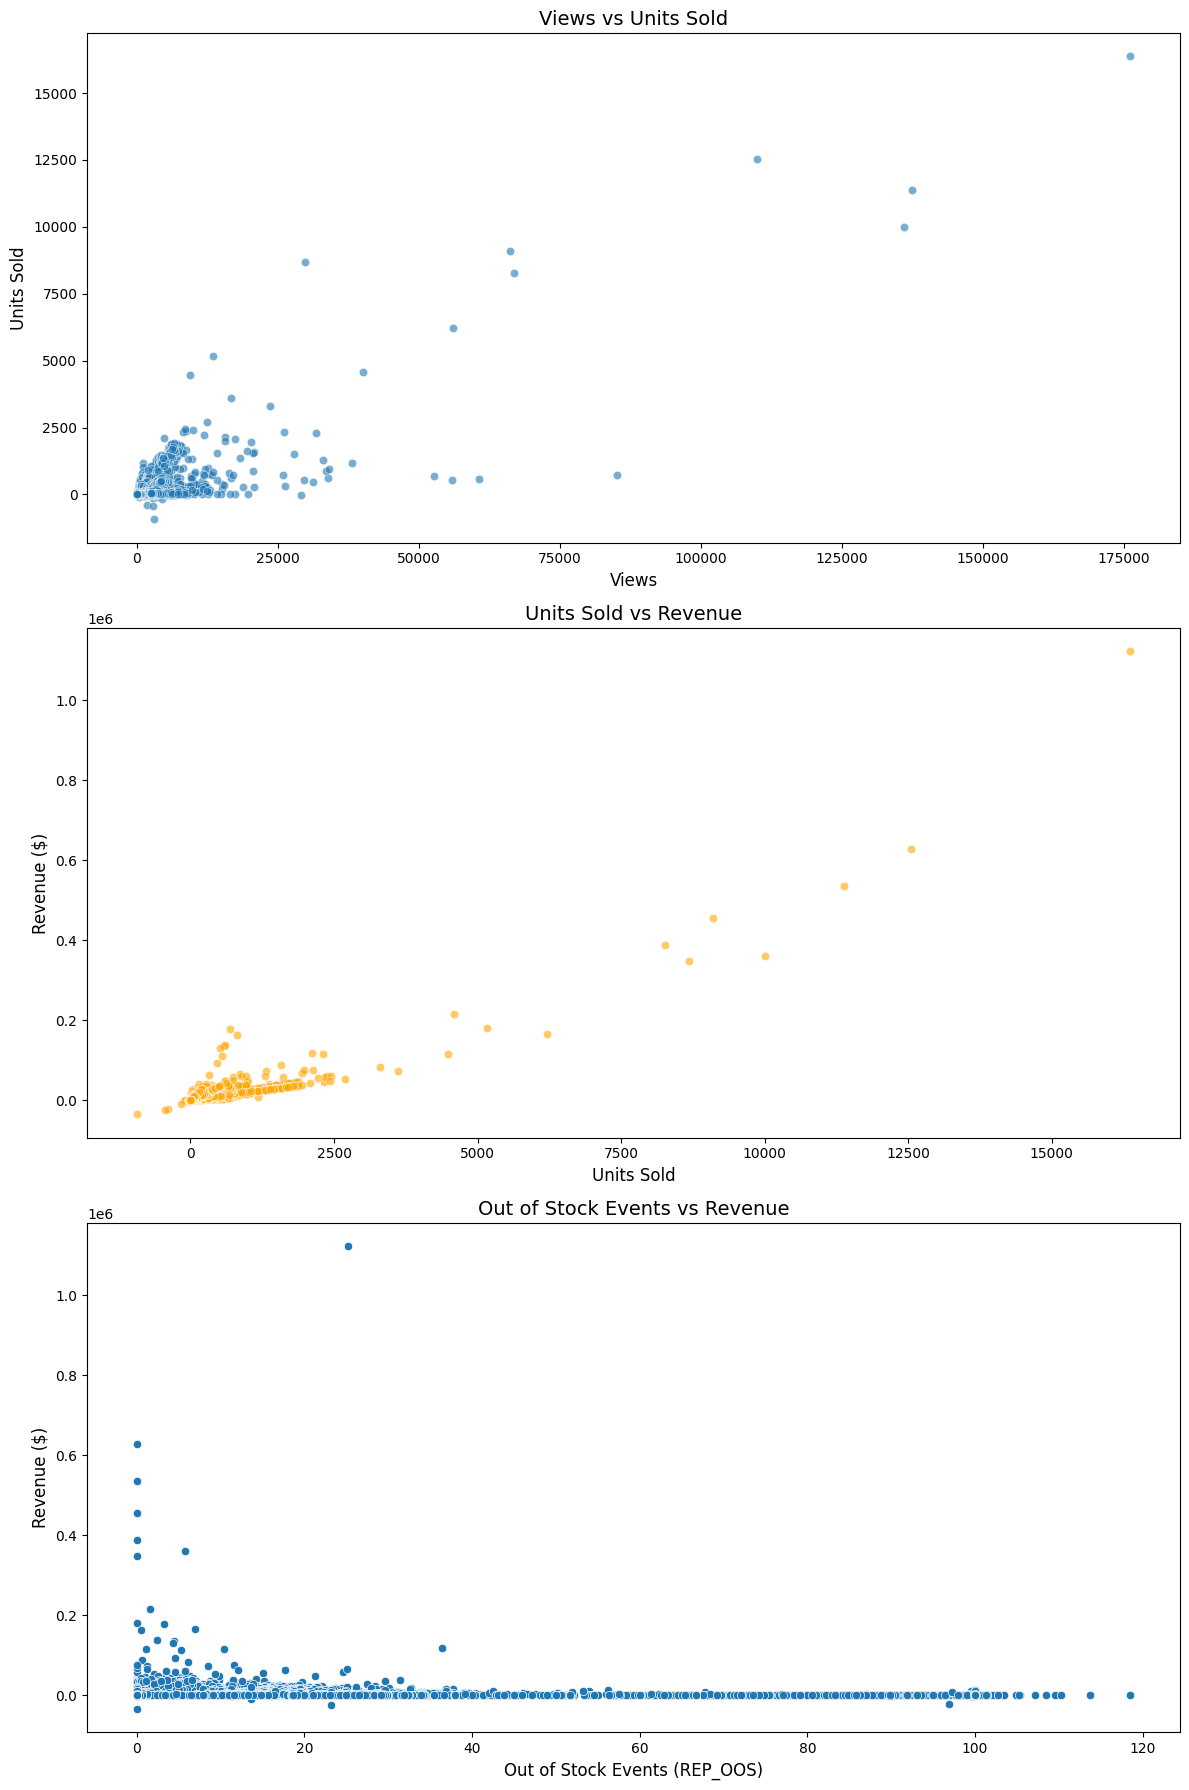

In [119]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Relationship between Views and Units Sold
sns.scatterplot(data=merged_data, x='VIEWS', y='ORDERED_UNITS', ax=axes[0], alpha=0.6)
axes[0].set_title('Views vs Units Sold', fontsize=14)
axes[0].set_xlabel('Views', fontsize=12)
axes[0].set_ylabel('Units Sold', fontsize=12)

# 2. Revenue vs Units Sold
sns.scatterplot(data=merged_data, x='ORDERED_UNITS', y='ORDERED_REVENUE', ax=axes[1], alpha=0.6, color='orange')
axes[1].set_title('Units Sold vs Revenue', fontsize=14)
axes[1].set_xlabel('Units Sold', fontsize=12)
axes[1].set_ylabel('Revenue ($)', fontsize=12)

# 3. Out of Stock Events (REP_OOS) vs Revenue
sns.scatterplot(data=merged_data, x='REP_OOS', y='ORDERED_REVENUE', ax=axes[2])
axes[2].set_title('Out of Stock Events vs Revenue', fontsize=14)
axes[2].set_xlabel('Out of Stock Events (REP_OOS)', fontsize=12)
axes[2].set_ylabel('Revenue ($)', fontsize=12)

plt.tight_layout()
plt.show()

##### **Insights:**
- **Views vs Units Sold:**

    - A positive correlation is expected: SKUs with higher views typically result in higher units sold.
    - Exceptions (e.g., high views with low units sold) may indicate issues like poor conversion rates, pricing mismatches, or lack of availability.

- **Units Sold vs Revenue:**

    - A strong positive relationship: More units sold generally lead to higher revenue.
    - Outliers (high revenue with low units sold) likely represent premium-priced SKUs.
- **Out of Stock Events (REP_OOS) vs Revenue:**

    - Higher out-of-stock events could result in lower revenue due to lost sales opportunities.


#### **Correlation**

In [120]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40426 entries, 0 to 40425
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SKU_NAME         40426 non-null  object        
 1   FEED_DATE        40426 non-null  datetime64[ns]
 2   CATEGORY         40426 non-null  object        
 3   SUB_CATEGORY     40426 non-null  object        
 4   ORDERED_REVENUE  40426 non-null  float64       
 5   ORDERED_UNITS    40426 non-null  int64         
 6   REP_OOS          40426 non-null  float64       
 7   VIEWS            40426 non-null  int64         
 8   YEAR             40426 non-null  int32         
 9   MONTH            40426 non-null  int32         
 10  DAY              40426 non-null  int32         
 11  WEEKDAY          40426 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(2), object(3)
memory usage: 3.1+ MB


In [121]:
merged_data.head()

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,VIEWS,YEAR,MONTH,DAY,WEEKDAY
0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.0,0,0.0,8,2019,5,18,5
1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.0,0,0.0,5,2019,5,19,6
2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.0,0,0.0,8,2019,5,22,2
3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.0,0,0.0,4,2019,5,23,3
4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.0,0,0.0,9,2019,5,27,0


In [122]:
numerical_columns = [
    col for col in merged_data.columns
    if merged_data[col].dtype in ['float64', 'int64', 'int32'] and col.lower() not in ['year','day','month','weekday']
]

# Display the resulting numerical columns
numerical_columns

['ORDERED_REVENUE', 'ORDERED_UNITS', 'REP_OOS', 'VIEWS']

In [123]:
merged_data[numerical_columns].corr()

,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,VIEWS
ORDERED_REVENUE,1.000000,0.881947,-0.012417,0.837448
ORDERED_UNITS,0.881947,1.000000,-0.030230,0.749537
REP_OOS,-0.012417,-0.030230,1.000000,0.013096
VIEWS,0.837448,0.749537,0.013096,1.000000


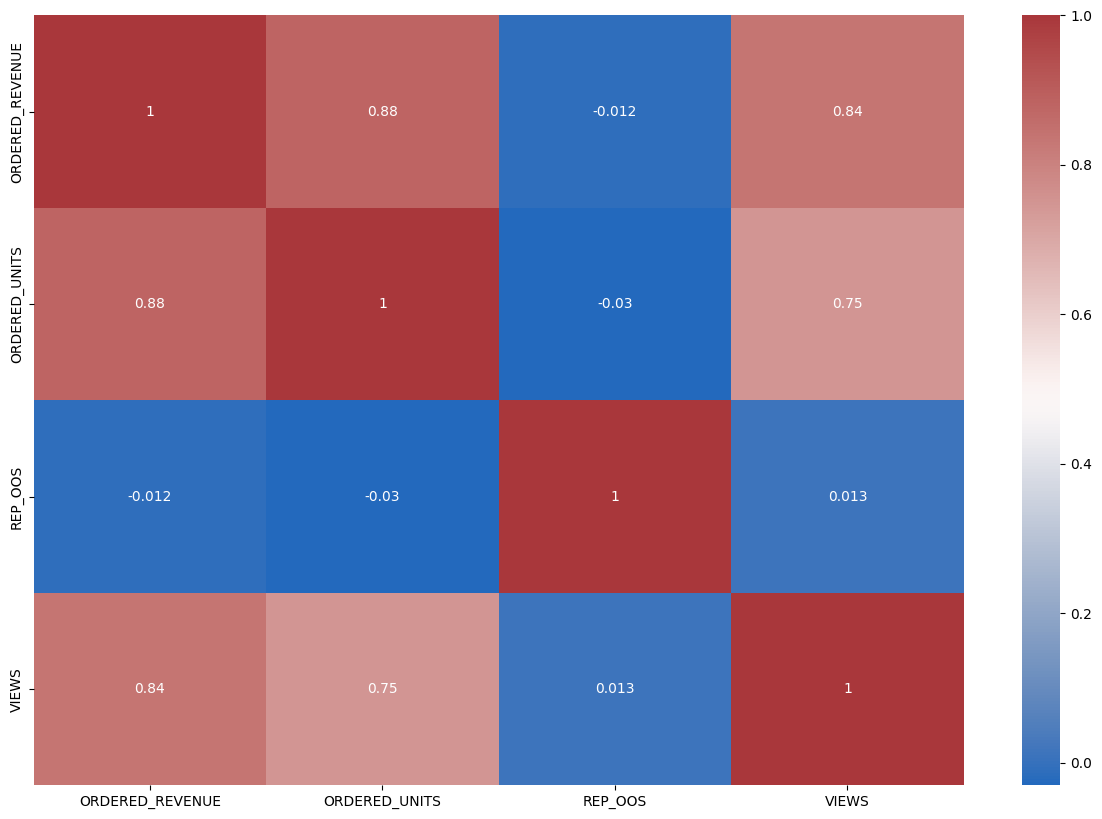

In [124]:
plt.figure(figsize=(15,10))

sns.heatmap(merged_data[numerical_columns].corr(), annot=True,cmap='vlag')
plt.show()

##### **Insights:**
- **Highly Correlated Variables**
    - Ordered Units and Ordered Revenue has the highest correlation
    - Ordered Revenue and Views
    - Ordered Units and Views
- **Weakly Correlated Variables**
    - REP_OOS and Ordered Revenue has the least correlation
    - REP_OOS and views
    - REP_OOS and Ordered units



## **1. Identify the most expensive SKU, on average, over the entire time period.**

In [127]:
merged_data.head()

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,VIEWS,YEAR,MONTH,DAY,WEEKDAY
0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.0,0,0.0,8,2019,5,18,5
1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.0,0,0.0,5,2019,5,19,6
2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.0,0,0.0,8,2019,5,22,2
3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.0,0,0.0,4,2019,5,23,3
4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.0,0,0.0,9,2019,5,27,0


In [132]:
merged_data['PRICE'] = merged_data.apply(
    lambda row: row['ORDERED_REVENUE'] / row['ORDERED_UNITS'] if row['ORDERED_UNITS'] > 0 else None, axis=1
)

# Compute the average price for each SKU across the dataset
average_price_by_sku = merged_data.groupby('SKU_NAME')['PRICE'].mean()

# Identify the most expensive SKU and its average price
most_expensive_sku = average_price_by_sku.idxmax()
max_average_price = average_price_by_sku.max()

print('Most expensive SKU:', most_expensive_sku, '\nAverage price:', max_average_price)

Most expensive SKU: C03CBL[721 
Average price: 1151.8587273143523


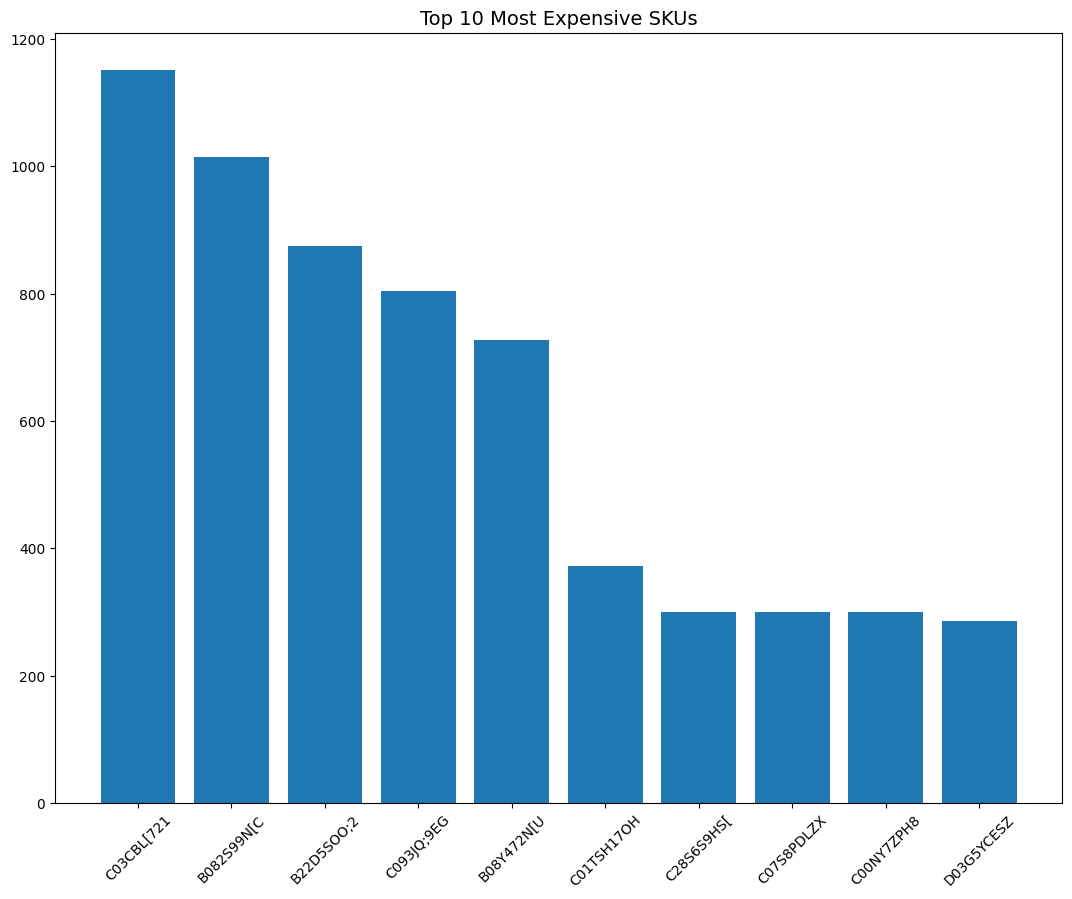

In [144]:
#Top 10 most expensive SKUs
top_10_expensive_skus = average_price_by_sku.sort_values(ascending=False).head(10)


plt.figure(figsize=(13,10))
plt.title('Top 10 Most Expensive SKUs', fontsize=14)
plt.tick_params(axis='x', rotation=45)
plt.bar(top_10_expensive_skus.index, top_10_expensive_skus.values)
plt.show()


## **2. What % of SKUs have generated some revenue in this time period? (brownie points - can you identify SKUs that stopped selling completely after July?)**
